## 二分木を表示する


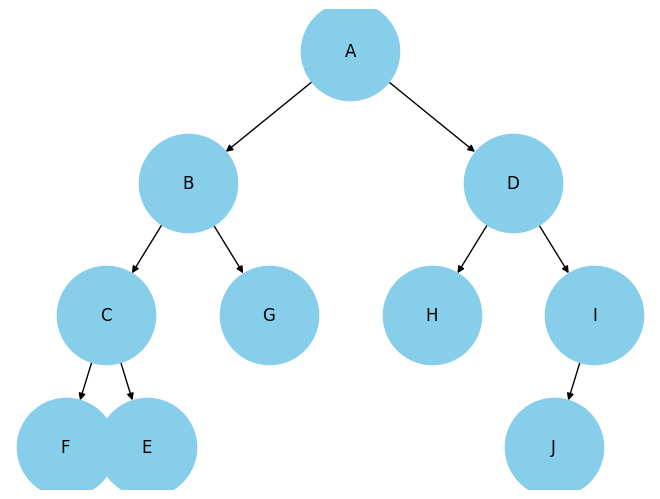

In [2]:
import matplotlib.pyplot as plt
import networkx as nx


class Node:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right


def draw_tree(
    tree, parent_name, graph, pos=None, level=0, width=2.0, vert_gap=0.4, xcenter=0.5
):
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)

    neighbors = list(graph.neighbors(parent_name))
    if len(neighbors) != 0:
        dx = width / 2
        nextx = xcenter - width / 2 - dx / 2
        for neighbor in neighbors:
            nextx += dx
            pos = draw_tree(
                tree,
                neighbor,
                graph=graph,
                pos=pos,
                level=level + 1,
                width=dx,
                xcenter=nextx,
            )
    return pos


def build_networkx_tree(tree, graph, parent=None):
    if tree is not None:
        graph.add_node(tree.value)
        if parent:
            graph.add_edge(parent, tree.value)
        if tree.left:
            build_networkx_tree(tree.left, graph, tree.value)
        if tree.right:
            build_networkx_tree(tree.right, graph, tree.value)


# tree = Node("*", Node("+", Node("-", Node(9), Node(3)), Node(1)), Node(6))
tree = Node("A")
node_l = Node("B")
node_ll = Node("C")
tree.left = node_l
node_l.left = node_ll

node_r = Node("D")
tree.right = node_r

node_llr = Node("E")
node_lll = Node("F")
node_ll.left = node_lll
node_ll.right = node_llr

node_lr = Node("G")
node_l.right = node_lr

node_rl = Node("H")
node_rr = Node("I")
node_r.left = node_rl
node_r.right = node_rr

node_rrl = Node("J")
tree.right.right.left = node_rrl

# Build networkx graph
G = nx.DiGraph()
build_networkx_tree(tree, G)

# Draw the tree
pos = draw_tree(tree, tree.value, G)
labels = {k: k for k, v in pos.items()}
nx.draw(
    G, pos=pos, labels=labels, with_labels=True, node_size=5000, node_color="skyblue"
)
plt.show()

## 三分木を表示する


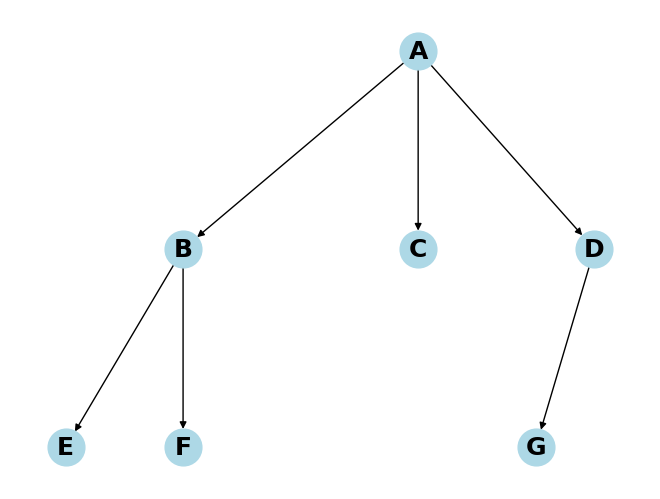

In [ ]:
class Node:
    def __init__(self, value, left=None, middle=None, right=None):
        self.value = value
        self.left = left
        self.middle = middle
        self.right = right


def draw_tree(root, graph, pos=None, level=0, parent=None, x=0):
    if root is None:
        return x

    graph.add_node(root.value)

    if parent:
        graph.add_edge(parent.value, root.value)

    next_x = x
    next_x = draw_tree(root.left, graph, pos, level + 1, root, next_x)
    next_x = draw_tree(root.middle, graph, pos, level + 1, root, next_x)
    next_x = draw_tree(root.right, graph, pos, level + 1, root, next_x)

    pos[root.value] = (x + (next_x - x) / 2, -level)

    return next_x + 1


# Create a sample tree
root = Node("A")
root.left = Node("B")
root.middle = Node("C")
root.right = Node("D")
root.left.left = Node("E")
root.left.right = Node("F")
root.right.left = Node("G")
# root = Node(
#     0,
#     Node("g", Node("p", Node(6)), Node("g", Node(1)), Node("c", Node(0))),
#     Node("c", Node("g", Node(6)), Node("c", Node(1)), Node("p", Node(0))),
#     Node("p", Node("c", Node(6)), Node("p", Node(1)), Node("g", Node(0))),
# )

# Draw the tree
G = nx.DiGraph()
pos = {}
draw_tree(root, G, pos)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=700,
    font_size=18,
)
plt.show()